In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = "/content/drive/MyDrive/Weather.zip"
extract_path = "/content/Weather"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files and directories
print("Extracted files and folders:", os.listdir(extract_path))

Extracted files and folders: ['Multi-class Weather Dataset']


In [ ]:
from PIL import Image  # Import Pillow
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import norm


In [ ]:

# Define dataset path
dataset_path = "/content/Weather/Multi-class Weather Dataset"

In [ ]:
pip install pillow


In [ ]:
# Load images and labels
image_size = (128, 128)  # Resize images to 128x128
images = []
labels = []

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.abspath(os.path.join(category_path, img_name))
            try:
                # Try using Pillow first
                with Image.open(img_path) as img:
                    img = img.convert("RGB")  # Ensure 3 channels
                    img = img.resize(image_size)
                    images.append(np.array(img))
                    labels.append(category)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

# Convert to NumPy arrays
images = np.array(images) / 255.0  # Normalize
labels = np.array(labels)

In [ ]:

# Encode labels
unique_labels = list(set(labels))
label_dict = {label: i for i, label in enumerate(unique_labels)}
labels = np.array([label_dict[label] for label in labels])
labels = to_categorical(labels, num_classes=len(unique_labels))


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


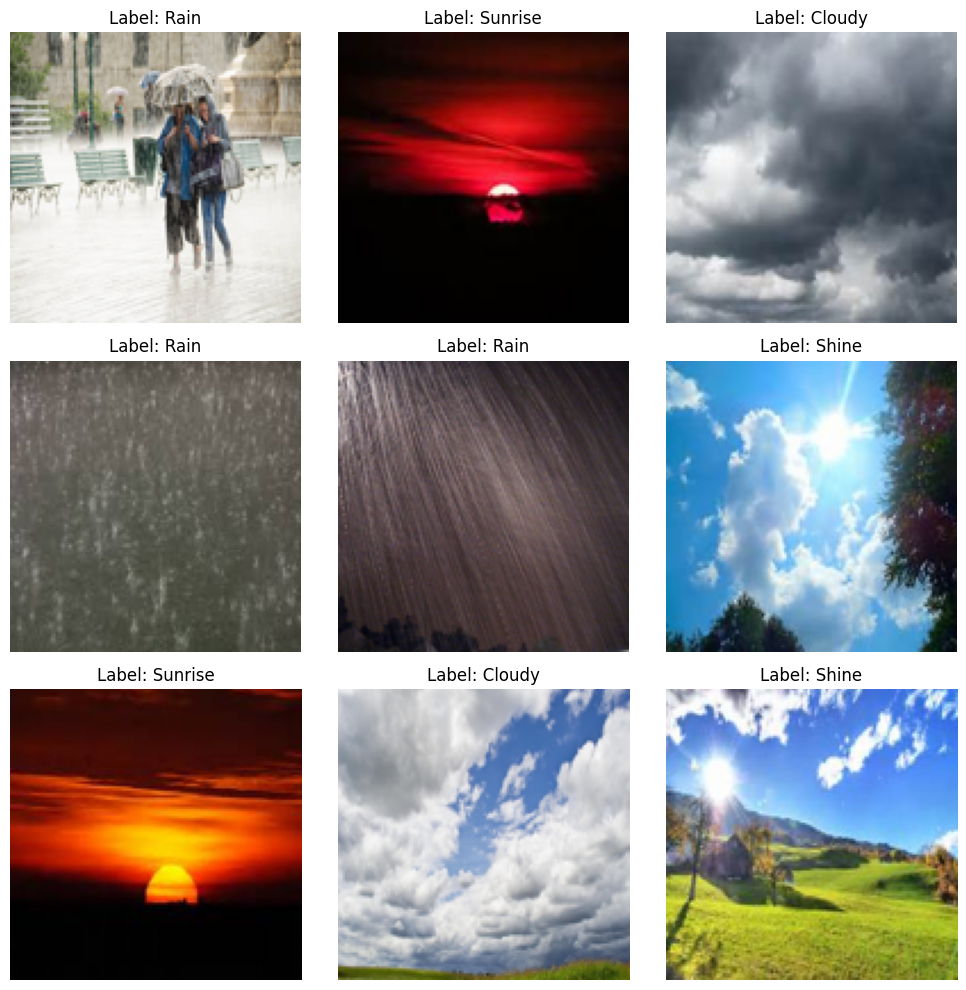

In [ ]:
import matplotlib.pyplot as plt
import random

# Define the number of images to display
num_images = 9
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Randomly select images and their labels
random_indices = random.sample(range(len(images)), num_images)

for i, ax in enumerate(axes.flat):
    img_index = random_indices[i]
    ax.imshow(images[img_index])  # Display the image
    ax.set_title(f"Label: {unique_labels[np.argmax(labels[img_index])]}")  # Show label
    ax.axis('off')  # Hide axis

plt.tight_layout()
plt.show()


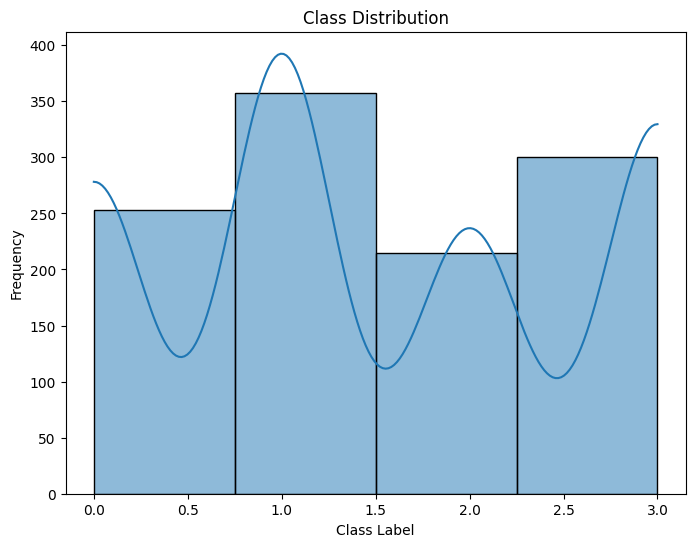

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # you are also using sns, so you will need to import seaborn

# Data Visualization
plt.figure(figsize=(8, 6))
sns.histplot(labels.argmax(axis=1), bins=len(unique_labels), kde=True)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

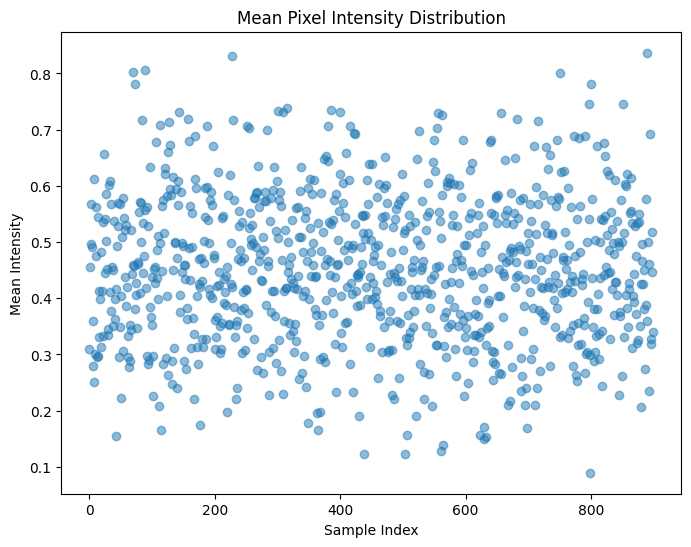

In [ ]:

# Scatter plot visualization of image pixel intensities
plt.figure(figsize=(8, 6))
plt.scatter(range(X_train.shape[0]), X_train.reshape(X_train.shape[0], -1).mean(axis=1), alpha=0.5)
plt.title("Mean Pixel Intensity Distribution")
plt.xlabel("Sample Index")
plt.ylabel("Mean Intensity")
plt.show()


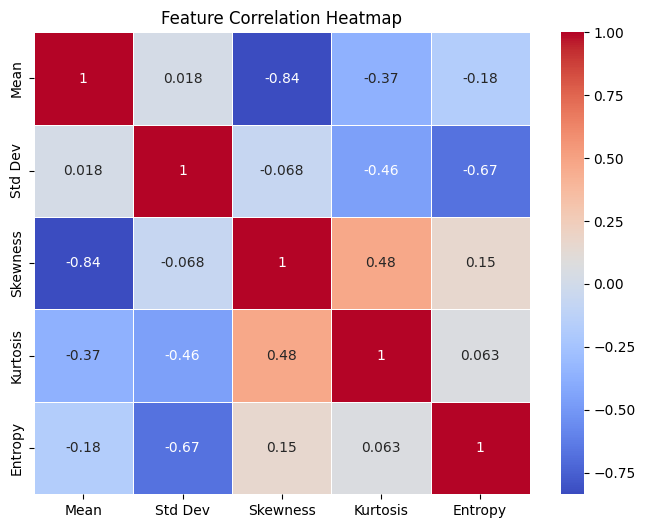

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy

# Correlation Matrix Visualization
correlation_matrix = np.corrcoef(X_train.reshape(X_train.shape[0], -1), rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Pixel Intensities")
plt.show()'''
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

def extract_features(images):
    features = []
    for img in images:
        mean_intensity = np.mean(img)
        std_dev = np.std(img)
        skewness = stats.skew(img.flatten())
        kurt = stats.kurtosis(img.flatten())
        entropy = -np.sum(img * np.log2(img + 1e-8))

        features.append([mean_intensity, std_dev, skewness, kurt, entropy])

    return pd.DataFrame(features, columns=["Mean", "Std Dev", "Skewness", "Kurtosis", "Entropy"])

feature_df = extract_features(images)

corr_matrix = feature_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(unique_labels), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model and store training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.4376 - loss: 1.2311 - val_accuracy: 0.4533 - val_loss: 1.2702
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6314 - loss: 0.8807 - val_accuracy: 0.7733 - val_loss: 0.6181
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7977 - loss: 0.5455 - val_accuracy: 0.7867 - val_loss: 0.5266
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8216 - loss: 0.4941 - val_accuracy: 0.8533 - val_loss: 0.5152
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8323 - loss: 0.4673 - val_accuracy: 0.8489 - val_loss: 0.4302
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8678 - loss: 0.4092 - val_accuracy: 0.8444 - val_loss: 0.4245
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8638 - loss: 0.3932 - val_accuracy: 0.8444 - val_loss: 0.4438
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8740 - loss: 0.3338 - val_accuracy: 0.8933 -

In [ ]:
# Get training accuracy from the last epoch
train_accuracy = history.history['accuracy'][-1]

# Evaluate test accuracy
loss, test_accuracy = model.evaluate(X_test, y_test)

# Print results
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9088 - loss: 0.2916 
Train Accuracy: 87.44%
Test Accuracy: 89.33%


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


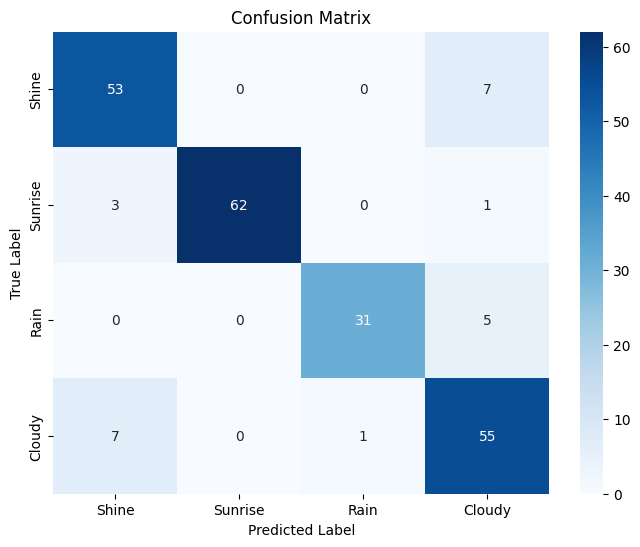

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
y_true_classes = np.argmax(y_test, axis=1)  # Get true class labels


# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_labels))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:
              precision    recall  f1-score   support

       Shine       0.84      0.88      0.86        60
     Sunrise       1.00      0.94      0.97        66
        Rain       0.97      0.86      0.91        36
      Cloudy       0.81      0.87      0.84        63

    accuracy                           0.89       225
   macro avg       0.90      0.89      0.90       225
weighted avg       0.90      0.89      0.89       225



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


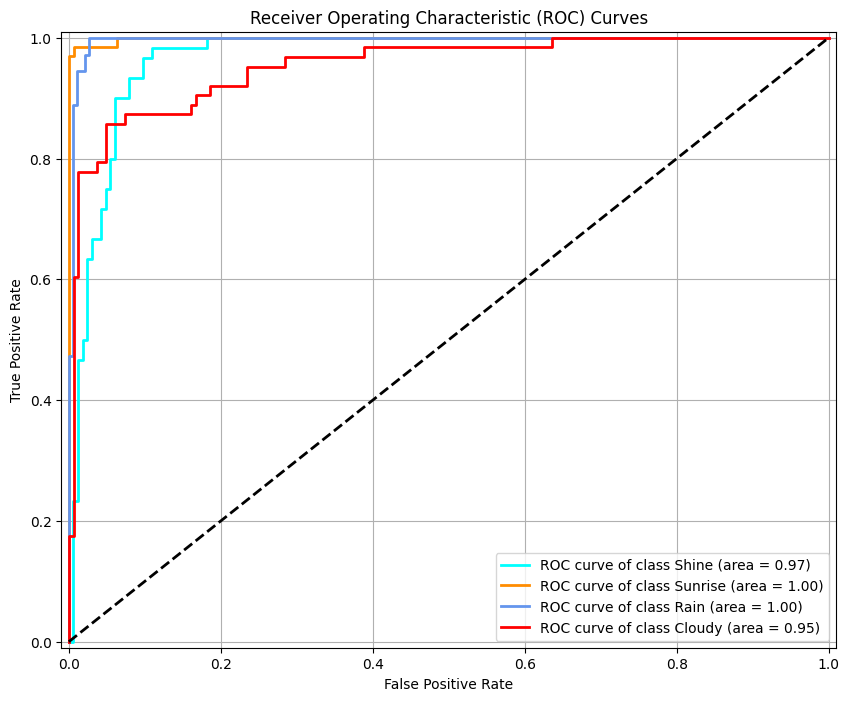

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Binarize the output (multi-class to binary for ROC)
y_test_binarized = label_binarize(np.argmax(y_test, axis=1), classes=range(len(unique_labels)))
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(unique_labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {unique_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import ttest_ind # Import ttest_ind from scipy.stats

# Z-test for train and test accuracy
def z_test(p1, p2, n1, n2):
    p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
    standard_error = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    z_score = (p1 - p2) / standard_error
    p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
    return z_score, p_value

train_samples = len(X_train)
test_samples = len(X_test)
z_score, p_value = z_test(train_accuracy, test_accuracy, train_samples, test_samples)
print(f"Z-score: {z_score:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference between train and test accuracy (p < 0.05). Model may be overfitting.")
else:
    print("No significant difference between train and test accuracy.")

# T-test for train and test accuracy
t_stat, t_p_value = ttest_ind(history.history['accuracy'], history.history['val_accuracy']) # Now you can use ttest_ind
print(f"T-test Statistic: {t_stat:.4f}, P-value: {t_p_value:.4f}")

# ANOVA test for multiple accuracy values


from scipy.stats import f_oneway

anova_stat, anova_p_value = f_oneway(history.history['accuracy'], history.history['val_accuracy']) # Now you can use f_oneway
print(f"ANOVA F-statistic: {anova_stat:.4f}, P-value: {anova_p_value:.4f}")

if anova_p_value < 0.05:
    print("Significant differences exist between training and validation accuracy over epochs.")
else:
    print("No significant differences between training and validation accuracy.")

Z-score: -0.7749, P-value: 0.4384
No significant difference between train and test accuracy.
T-test Statistic: 0.3816, P-value: 0.7057
ANOVA F-statistic: 0.1456, P-value: 0.7057
No significant differences between training and validation accuracy.
